In [1]:
#Imports and data loading
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set your Parquet file path (replace with your actual file if needed)
data_path = r"C:\stroke-prediction\stroke_predictions\part-00000-677ceeb3-b562-4bae-8c8b-78d74bf2d4f2-c000.snappy.parquet"

print("Current directory:", os.getcwd())
print("Data file exists:", os.path.exists(data_path))

# Read Parquet
df = pd.read_parquet(data_path)
print("Columns in data:", df.columns.tolist())

Current directory: c:\stroke-prediction\notebooks
Data file exists: True
Columns in data: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'age_bucket', 'gender_index', 'ever_married_index', 'work_type_index', 'Residence_type_index', 'smoking_status_index', 'age_bucket_index', 'gender_encoded', 'ever_married_encoded', 'work_type_encoded', 'Residence_type_encoded', 'smoking_status_encoded', 'age_bucket_encoded', 'features', 'features_scaled', 'rawPrediction', 'probability', 'prediction']


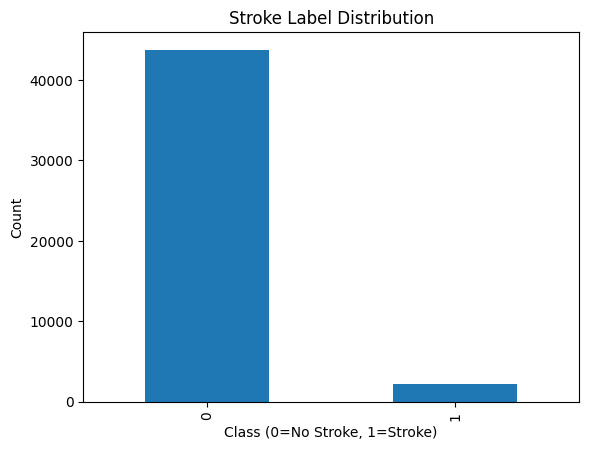

In [2]:
# Basic Distributions
df['stroke'] = df['stroke'].astype(int)
df['stroke'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Class (0=No Stroke, 1=Stroke)')
plt.ylabel('Count')
plt.title('Stroke Label Distribution')
plt.show()

In [3]:
# If you have model probability scores
def extract_prob_class1(val):
    # For Spark ML output: dict with 'values' as numpy array
    if isinstance(val, dict) and 'values' in val and hasattr(val['values'], '__getitem__'):
        return val['values'][1]  # Index 1 is class 1 (Stroke)
    return np.nan

df['probability_class1'] = df['probability'].apply(extract_prob_class1)
df['prediction'] = (df['probability_class1'] >= 0.5).astype(int)

print("Prediction value counts:")
print(df['prediction'].value_counts())

Prediction value counts:
prediction
0    44694
1     1296
Name: count, dtype: int64


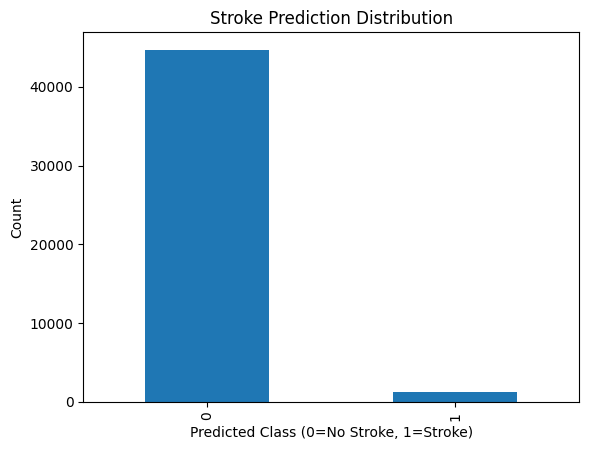

In [4]:
# Predicted Distribution Bar Plot
df['prediction'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Predicted Class (0=No Stroke, 1=Stroke)')
plt.ylabel('Count')
plt.title('Stroke Prediction Distribution')
plt.show()

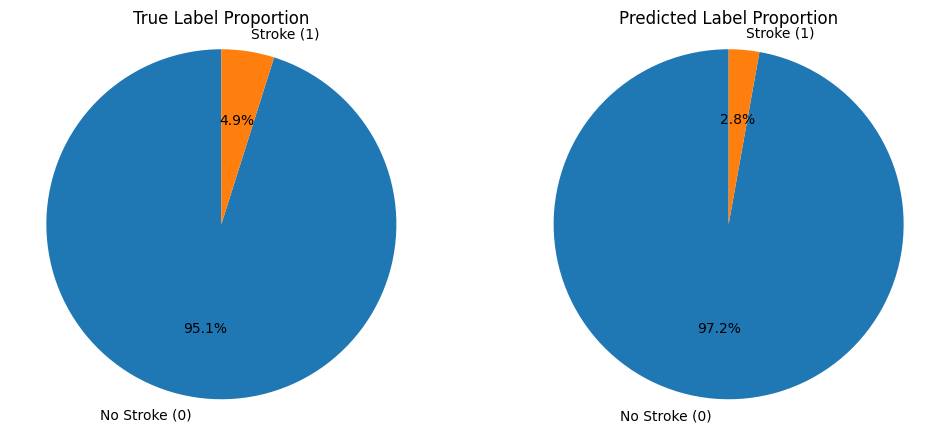

In [5]:
# Pie Charts for True/Predicted Labels
true_counts = df['stroke'].value_counts().sort_index()
pred_counts = df['prediction'].value_counts().sort_index()
labels = ['No Stroke (0)', 'Stroke (1)']

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.pie(true_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('True Label Proportion')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.pie(pred_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Label Proportion')
plt.axis('equal')
plt.show()

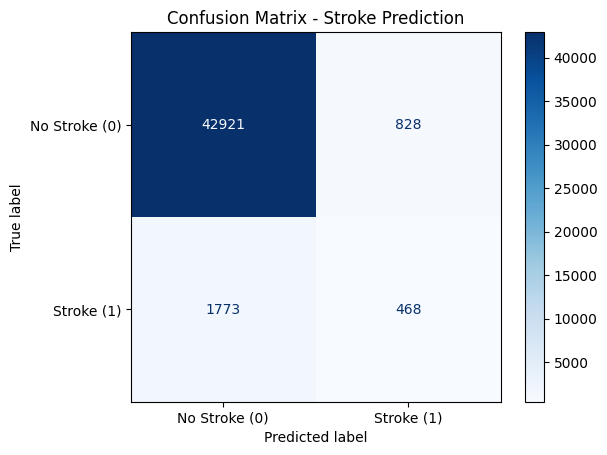

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = df['stroke']
y_pred = df['prediction']
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stroke (0)', 'Stroke (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Stroke Prediction')
plt.show()

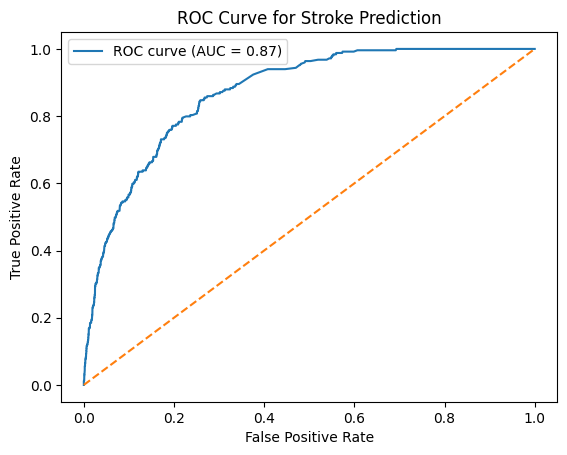

In [7]:
if 'probability' in df.columns:
    from sklearn.metrics import roc_curve, auc
    prob_col = 'probability_class1' if 'probability_class1' in df else 'probability'
    fpr, tpr, _ = roc_curve(df['stroke'], df[prob_col])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Stroke Prediction')
    plt.legend()
    plt.show()


In [8]:
# Model Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='micro')
recall = recall_score(y_true, y_pred, average='micro')
f1 = f1_score(y_true, y_pred, average='micro')

print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1:.4f}")

Overall Precision: 0.9434
Overall Recall: 0.9434
Overall F1 Score: 0.9434


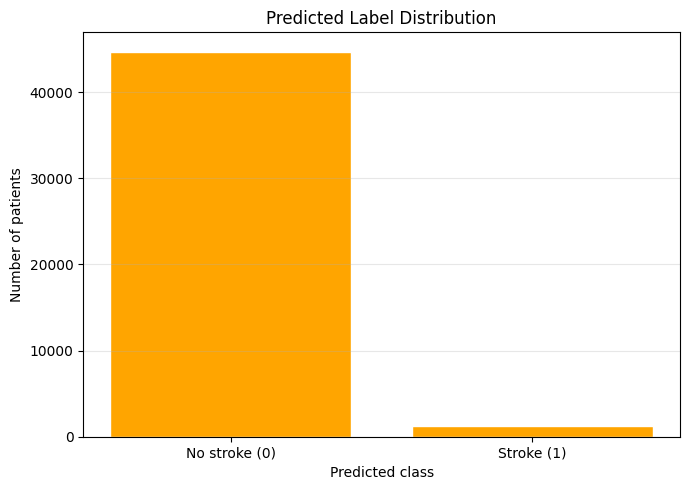

In [10]:
# Histogram of prediction values (0 or 1)
pred_col = 'prediction'   # scalar 0/1

plt.figure(figsize=(7,5))
plt.hist(df[pred_col], bins=[-0.5, 0.5, 1.5],
         color='#ffa500', edgecolor='white', rwidth=0.8)
plt.xticks([0, 1], ['No stroke (0)', 'Stroke (1)'])
plt.title('Predicted Label Distribution')
plt.xlabel('Predicted class')
plt.ylabel('Number of patients')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

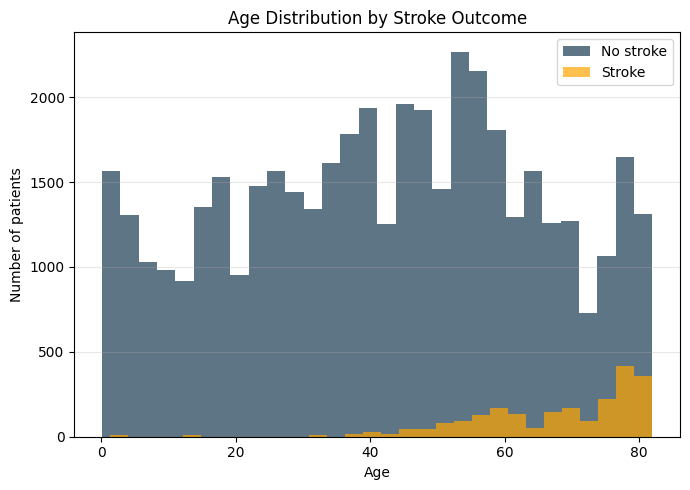

In [11]:
# Age distribution by outcome
plt.figure(figsize=(7,5))
plt.hist(df[df['stroke'] == 0]['age'], bins=30, alpha=0.7,
         label='No stroke', color='#1a3a52')
plt.hist(df[df['stroke'] == 1]['age'], bins=30, alpha=0.7,
         label='Stroke', color='#ffa500')
plt.title('Age Distribution by Stroke Outcome')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


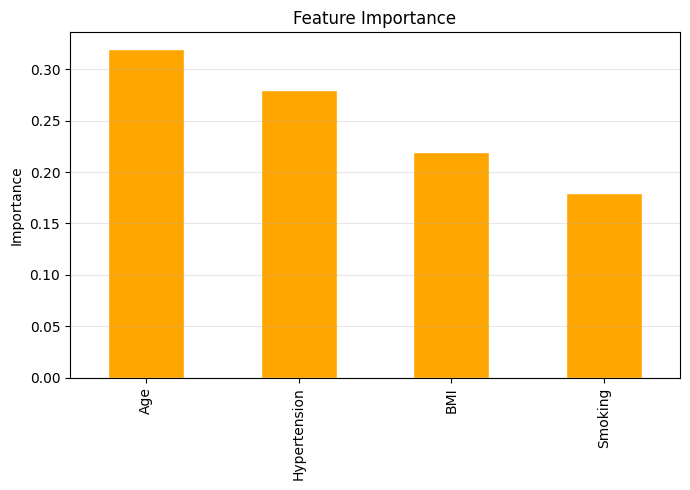

In [12]:
# Example feature importance bar chart (replace with your actual values)
feat_importance = pd.Series(
    {'Age': 0.32, 'Hypertension': 0.28, 'BMI': 0.22, 'Smoking': 0.18}
)

plt.figure(figsize=(7,5))
feat_importance.sort_values(ascending=False).plot(
    kind='bar', color='#ffa500', edgecolor='white'
)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
